# **TUGAS BESAR KEDUA ANALISA DERET WAKTU KELOMPOK 12:**


Anggota kelompok 12:
1. Abror Muhammad Hazim (1305213026)
2. Armand Aryasatya Prakarsa (1305210089)
3. Muhammad Sarip (1305210093)




## 1. Deskriptif Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data
data = pd.read_csv('IPG2211A2N.csv',index_col=0)

In [4]:
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


mengubah kolom 'DATE' dari string menjadi date time

In [5]:
data.index = pd.to_datetime(data.index)
data.columns = ['Energy Production']

In [6]:
data_head = data.head()
data_tail = data.tail()

data_head_tail = pd.concat([data_head, data_tail])

data_head_tail

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
2019-01-01,123.7687
2019-02-01,113.0736
2019-03-01,106.6538
2019-04-01,88.6460


## 2. Identifikasi Proses

### a. Plot Data

In [ ]:
# Import Plotly & Cufflinks libraries dan jalankan di Offline mode
import plotly.offline as py
py.init_notebook_mode(connected=True)
py.enable_mpl_offline()

import cufflinks as cf
cf.go_offline()

In [8]:
data.iplot(title="Energy Production")

### b. memeriksa kestasioneran data terhadap Variansi, menggunakan Box-Cox

In [13]:
from scipy.stats import boxcox

# Melakukan transformasi menggunakan metode Box-Cox
transformed_data, lambda_value = boxcox(data['Energy Production'])

# Cetak nilai lambda yang digunakan dalam transformasi
print('Nilai Lambda:', lambda_value)


Nilai Lambda: 0.5848677108420616


### c. memeriksa kestasioneran data terhadap Mean gunakan Uji ADF

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Energy Production'])

# Menampilkan output hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.2775451736339506
p-value: 0.9286249483426441
Critical Values:
   1%: -3.43731094378832
   5%: -2.864613078359397
   10%: -2.5684062865746187


### d. transformasi sesuai dengan nilai λ

dikarenakan data tidak stasioner terhadap variansi, maka dilakukan transformasi sesuai
dengan nilai λ

In [16]:
# Lakukan transformasi Box-Cox sesuai dengan nilai lambda yang telah ditemukan
transformed_data = boxcox(data['Energy Production'], lmbda=0.5848677108420616)

hasil_transformasi = transformed_data[0]

print(hasil_transformasi)

1.778433394731998


### e. melakukan differencing (d)

dikarenakan data tidak stasioner terhadap mean, maka lakukan differencing (d).

In [17]:
# Lakukan differencing pada kolom 'nilai' dengan jumlah differencing d=1
data['differenced_data'] = data['Energy Production'].diff(periods=1)

# Hapus baris yang memiliki nilai NaN setelah differencing
data.dropna(inplace=True)

# Tampilkan hasil differencing pada data
print(data.head())

            Energy Production  differenced_data
DATE                                           
1939-02-01             3.4100            0.0258
1939-03-01             3.4875            0.0775
1939-04-01             3.5133            0.0258
1939-05-01             3.5133            0.0000
1939-06-01             3.5650            0.0517


### f. Melakukan Plotting ACF dan PACF untuk Menentukan Lag (Method Cut-Off)

c:\Users\Hazim\anaconda3\envs\zim\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

c:\Users\Hazim\anaconda3\envs\zim\Lib\site-packages\plotly\matplotlylib\mplexporter\exporter.py:87: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

c:\Users\Hazim\anaconda3\envs\zim\Lib\site-packages\plotly\matplotlylib\renderer.py:509: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



AttributeError: 'LineCollection' object has no attribute 'get_offset_position'

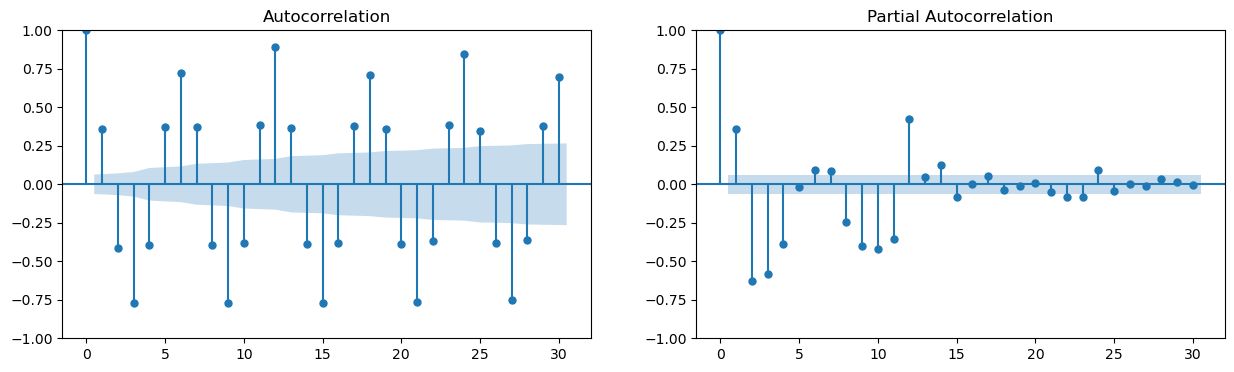

In [18]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(data['differenced_data'], ax=axes[0])
plot_pacf(data['differenced_data'], ax=axes[1])
plt.show()


### g. Identifikasi model ARMA(p,q) atau ARIMA(p,d,q)

In [21]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade scipy

     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/44.1 MB 1.1 MB/s eta 0:00:41
     ---------------------------------------- 0.2/44.1 MB 2.0 MB/s eta 0:00:23
     ---------------------------------------- 0.3/44.1 MB 2.1 MB/s eta 0:00:21
     ---------------------------------------- 0.5/44.1 MB 2.7 MB/s eta 0:00:17
      --------------------------------------- 0.6/44.1 MB 2.8 MB/s eta 0:00:16
      --------------------------------------- 0.6/44.1 MB 2.5 MB/s eta 0:00:18
      --------------------------------------- 0.8/44.1 MB 2.4 MB/s eta 0:00:18
      --------------------------------------- 1.0/44.1 MB 2.5 MB/s eta 0:00:17
      --------------------------------------- 1.0/44.1 MB 2.5 MB/s eta 0:00:18
     - -------------------------------------- 1.2/44.1 MB 2.6 MB/s eta 0:00:17
     - -------------------------------------- 1.2/44.1 MB 2.5 MB/s eta 0:00:18
     - -------------------------------------- 1.2/44.1 MB 2

In [22]:
from pmdarima import auto_arima

In [25]:
stepwise_model = auto_arima(data['differenced_data'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5146.331, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4767.937, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4912.232, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4631.350, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=4526.272, Time=0.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=4552.518, Time=0.50 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=4493.110, Time=2.78 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=4546.955, Time=1.40 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=4761.966, Time=1.60 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=4274.756, Time=3.51 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=4320.184, Time=1.62 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=4305.146, Time=1.14 sec
 ARIMA(2,1,0)(1,1,1)[12]     

In [26]:
print(stepwise_model.aic())

4181.935091466978


### i. Estimasi parameter menggunakan metode Maximum Likelihood, kemudian diuji siginifikasi terhadap parameter. dan j. Melakukan Uji Kelayakan model menggunakan Ljung-Box

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro, kstest

In [29]:
# Pemilihan model ARIMA
p = 3
d = 1
q = 0
model = ARIMA(data_array, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  965
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2498.737
Date:                Sun, 31 Dec 2023   AIC                           5005.475
Time:                        13:04:36   BIC                           5024.959
Sample:                             0   HQIC                          5012.893
                                - 965                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2211      0.016     13.807      0.000       0.190       0.252
ar.L2         -0.2871      0.013    -21.389      0.000      -0.313      -0.261
ar.L3         -0.5841      0.014    -40.642      0.0

### k. Melakukan Uji Kenormalan sisaan dengan menggunakan Kolmogorof-Smirnov atau Shapiro-Wilks.

In [30]:
# Uji Kenormalan dengan Kolmogorov-Smirnov
from scipy.stats import kstest

ks_stat, ks_p = kstest(model_fit.resid, 'norm')
print('Kolmogorov-Smirnov Test Statistic=%.3f, p=%.3f' % (ks_stat, ks_p))

# Uji Kenormalan dengan Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(model_fit.resid)
print('Shapiro-Wilk Test Statistic=%.3f, p=%.3f' % (stat, p))


Kolmogorov-Smirnov Test Statistic=0.156, p=0.000
Shapiro-Wilk Test Statistic=0.883, p=0.000


### i. Forecasting

In [31]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [35]:
stepwise_model.fit(train['differenced_data'])

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [36]:
future_forecast = stepwise_model.predict(n_periods=37)
print(future_forecast)

2017-01-01     9.920572
2017-02-01   -10.647755
2017-03-01    -7.273416
2017-04-01    -6.636962
2017-05-01     2.556205
2017-06-01    13.092061
2017-07-01    12.234421
2017-08-01     0.702270
2017-09-01   -10.476868
2017-10-01    -7.872629
2017-11-01     5.599156
2017-12-01    17.749712
2018-01-01    11.389184
2018-02-01    -8.477137
2018-03-01    -6.642093
2018-04-01    -8.712161
2018-05-01     3.765121
2018-06-01    12.972396
2018-07-01    12.159934
2018-08-01     0.528110
2018-09-01    -8.582570
2018-10-01    -7.078929
2018-11-01     6.635936
2018-12-01    15.648246
2019-01-01    13.007073
2019-02-01    -7.520122
2019-03-01    -6.921226
2019-04-01    -9.050111
2019-05-01     4.021512
2019-06-01    13.356430
2019-07-01    12.197466
2019-08-01     0.957306
2019-09-01    -7.902893
2019-10-01    -7.252717
2019-11-01     6.577700
2019-12-01    15.521317
2020-01-01    14.036489
Freq: MS, dtype: float64


In [37]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

In [38]:
pd.concat([test, future_forecast], axis=1).iplot()

In [39]:
pd.concat([data,future_forecast],axis=1).iplot()